In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("blinkit_data.csv")

In [3]:
df.head(5)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [5]:
df.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

In [6]:
df.describe()


,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [7]:
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [8]:
df.isnull().mean()*100

index            0.000000
product          0.003629
category         0.000000
sub_category     0.000000
brand            0.003629
sale_price       0.000000
market_price     0.000000
type             0.000000
rating          31.304663
description      0.417347
dtype: float64

In [9]:
df.shape

(27555, 10)

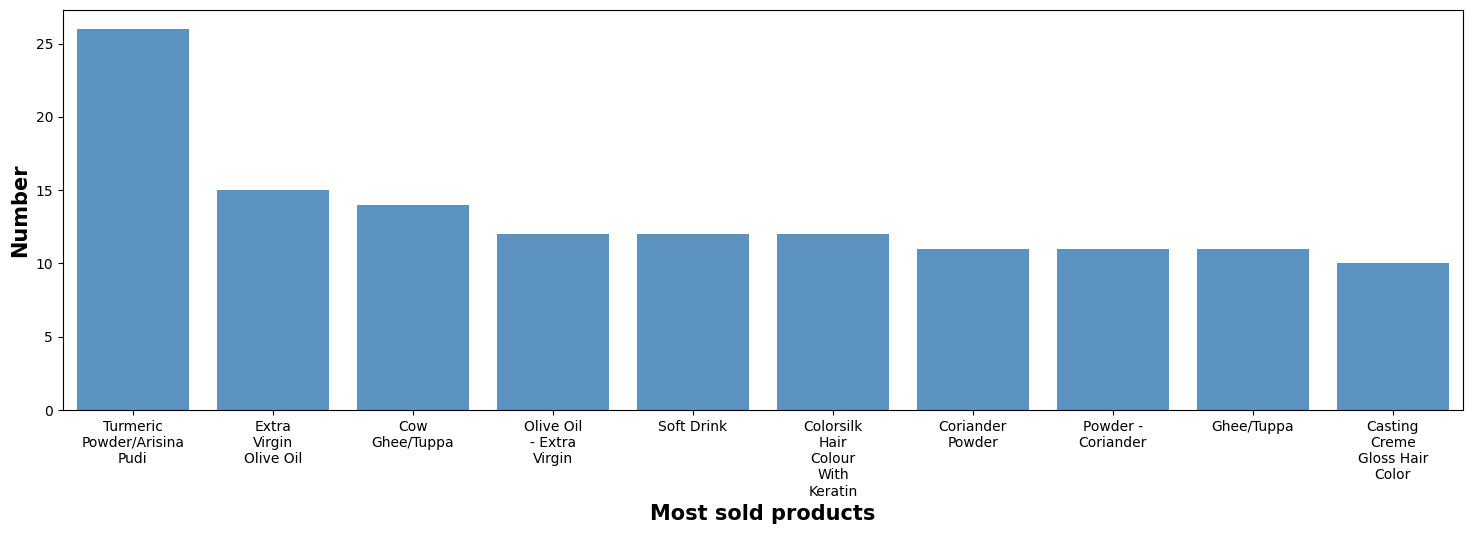

In [10]:
# Calculate the top most sold products
top = df['product'].value_counts().head(10)

fig = plt.figure(figsize=(14,4))
ax = fig.add_axes([0,0,1,1])

import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

sns.barplot(x=top.index, y=top.values,
            linewidth=0,
            alpha=1.0,
            color="#4b94cf")

#format axis
ax.set_xlabel("Most sold products",fontsize=15, weight='semibold')
ax.set_ylabel("Number",fontsize=15, weight='semibold')

wrap_labels(ax, 10)

plt.show()

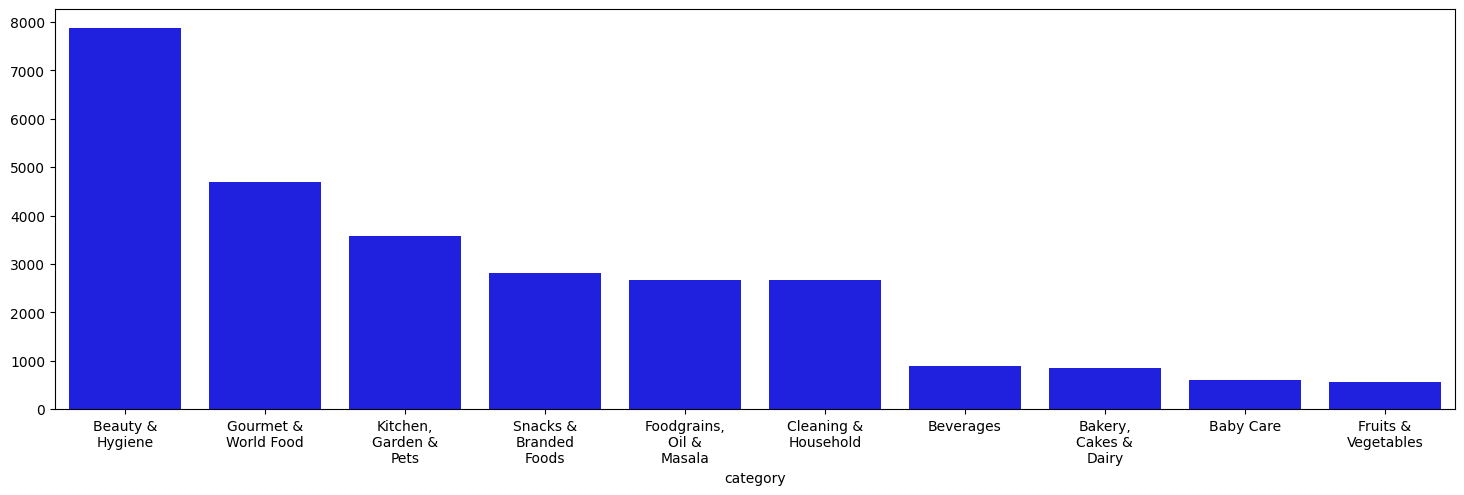

In [15]:
fig = plt.figure(figsize=(14,4))
ax2 = fig.add_axes([0,0,1,1])
sns.barplot(x=df["category"].value_counts()[:10].index, y=df["category"].value_counts()[:10].values,
            linewidth=0, color='b', alpha=1.0)

wrap_labels(ax2,10)

In [18]:
df["diff_in_prices"] = df["market_price"] - df["sale_price"]

discount = df[df["diff_in_prices"] != 0]
discount

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,diff_in_prices
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",131.00
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,27.00
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.00,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...,30.00
10,11,Wheat Grass Powder - Raw,Gourmet & World Food,Cooking & Baking Needs,NUTRASHIL,261.00,290.0,Flours & Pre-Mixes,4.0,Wheatgrass is a superfood potent health food w...,29.00
15,16,Dove Plastic Soap Case - Assorted Colour,Cleaning & Household,Bins & Bathroom Ware,Nakoda,49.00,59.0,Soap Cases & Dispensers,4.0,This soap case is made of virgin plastic which...,10.00
...,...,...,...,...,...,...,...,...,...,...,...
27546,27547,Organic Powder - Garam Masala,"Foodgrains, Oil & Masala",Organic Staples,Organic Tattva,152.00,160.0,Organic Masalas & Spices,4.2,Organic Tattva Garam masala is a famous spice ...,8.00
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...,49.80
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...,7.50
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori...",99.00


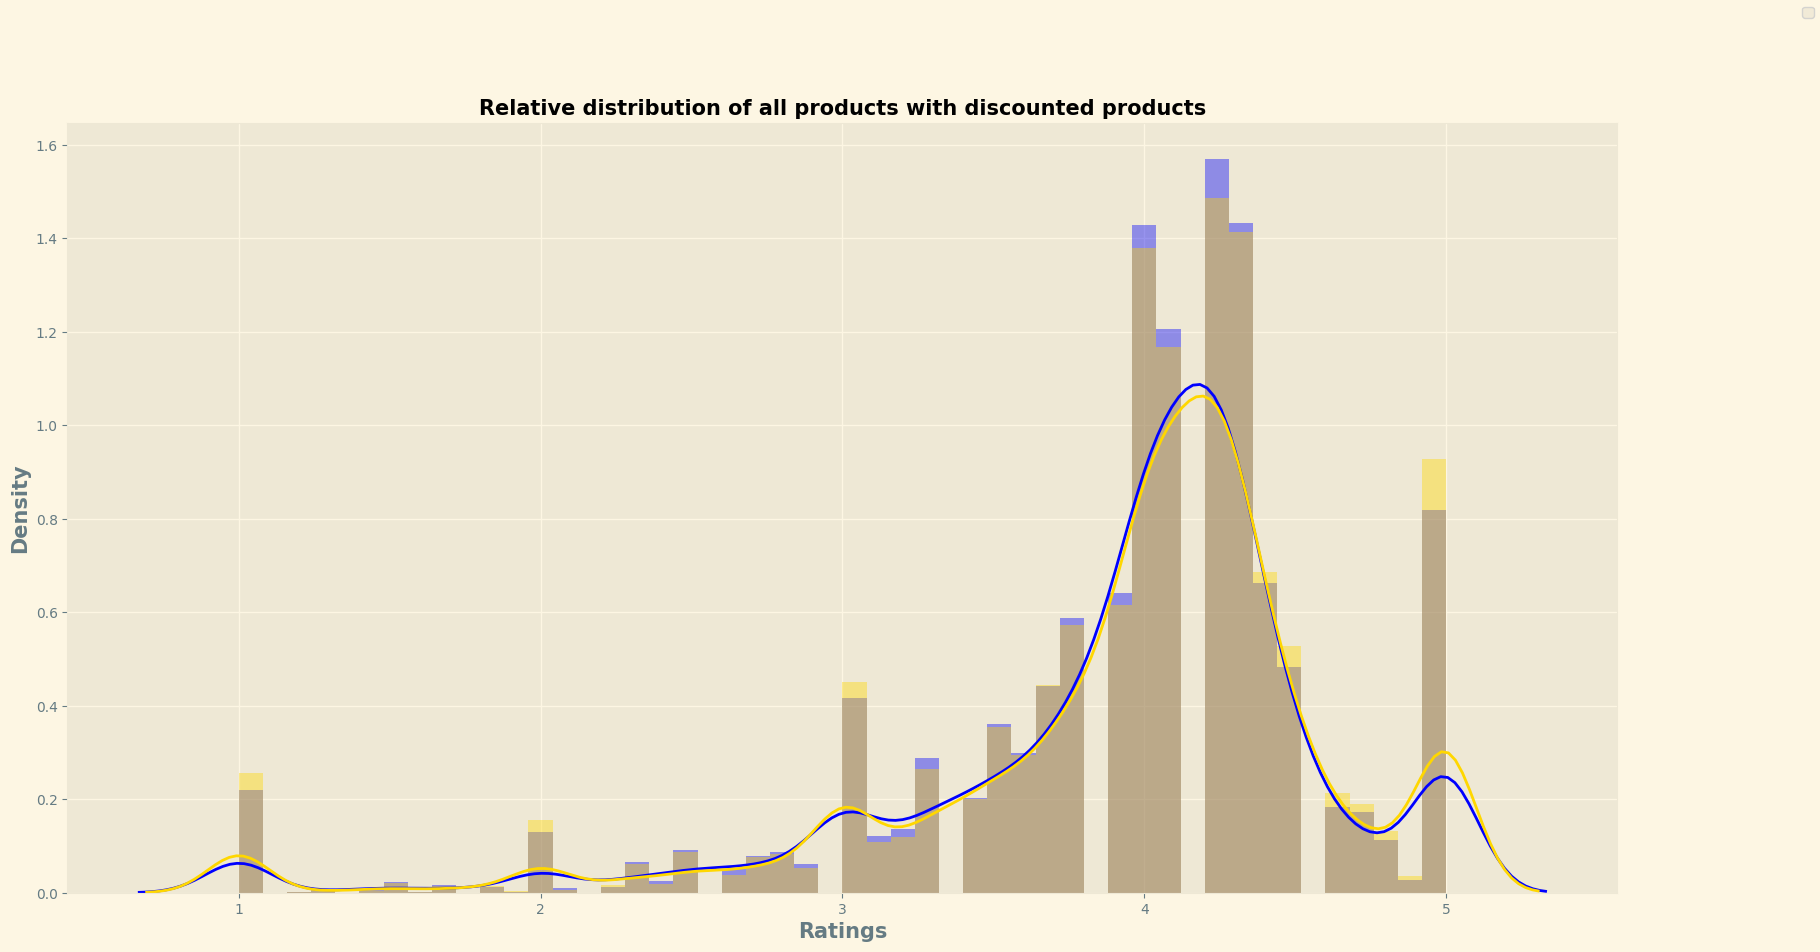

In [20]:
fig = plt.figure(figsize=(20,10))

plt.style.use("Solarize_Light2")
sns.distplot(discount.rating, color='b', kde =True)
sns.distplot(df.rating, color='gold', kde =True)
plt.xlabel("Ratings",fontsize=15, weight='semibold')
plt.ylabel("Density",fontsize=15, weight='semibold')
plt.title("Relative distribution of all products with discounted products",fontsize=15, weight='semibold')
fig.legend()
plt.show()